In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import numpy as np

In [150]:
df = pd.read_csv("dataframe.csv")
df.head(100)

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,...,finish_type,living_meters,kitchen_meters,phone,ceiling_height,district,street,house_number,underground,residential_complex
0,ANT Development,developer,https://www.cian.ru/sale/flat/303519398/,Москва,sale,flat,11,13,5,265.6,...,Чистовая,-1,-1,74951346248,3 м,Дорогомилово,NaN,3к1,Парк Победы,Виктори Парк Резиденсез ЖК
1,ID 18174647,realtor,https://www.cian.ru/sale/flat/301450189/,Москва,sale,flat,26,31,5,246.7,...,-1,"140,9 м²",28 м²,79166462390,"3,1 м",Очаково-Матвеевское,Нежинская,1к1,Давыдково,Кутузовская Ривьера
2,Monumental Group,real_estate_agent,https://www.cian.ru/sale/flat/306835123/,Москва,sale,flat,4,8,5,117.0,...,-1,-1,10 м²,79672086536,"3,2 м",Пресненский,Большая Садовая,3С1,Маяковская,NaN
3,Главстрой,developer,https://www.cian.ru/sale/flat/296921235/,Москва,sale,flat,24,24,5,172.5,...,Без отделки,"104,6 м²","10,5 м²",74951379308,"3,2 м",Филевский парк,Береговой проезд,2,Фили,Береговой-2
4,Рента,real_estate_agent,https://www.cian.ru/sale/flat/307983948/,Москва,sale,flat,3,9,5,234.8,...,-1,140 м²,23 м²,79663231016,-1,Тверской,Краснопролетарская,7,Новослободская,Ласточкино гнездо
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Наталья Сказка,realtor,https://balashikha.cian.ru/sale/flat/308713395/,Балашиха,sale,flat,17,17,1,35.0,...,-1,16 м²,9 м²,79660583570,-1,NaN,Колдунова,10,Щёлковская,NaN
96,Челофт,real_estate_agent,https://balashikha.cian.ru/sale/flat/306480536/,Балашиха,sale,flat,18,21,1,40.2,...,-1,30 м²,5 м²,79651040944,"2,8 м",NaN,Граничная,38,Ольгино,NaN
97,Самолет,developer,https://balashikha.cian.ru/sale/flat/308650870/,Балашиха,sale,flat,20,22,1,36.39,...,"Без отделки, черновая, чистовая","11,8 м²","13,6 м²",74997154380,"2,74 м",NaN,NaN,к8,Некрасовка,Новоград Павлино
98,МИЦ-Столичный ипотечный центр недвижимости,real_estate_agent,https://balashikha.cian.ru/sale/flat/308068494/,Балашиха,sale,flat,10,22,1,34.0,...,-1,15 м²,10 м²,79163236639,-1,NaN,шоссе Косинское,7,Ольгино,Новоград Павлино


In [151]:
df.drop(columns=['residential_complex','author','heating_type', 'author_type', 'deal_type', 'url', 'accommodation_type', 'phone', 'house_number','heating_type','heating_type'], inplace=True)
df.shape

(7978, 18)

<Figure size 1000x600 with 0 Axes>

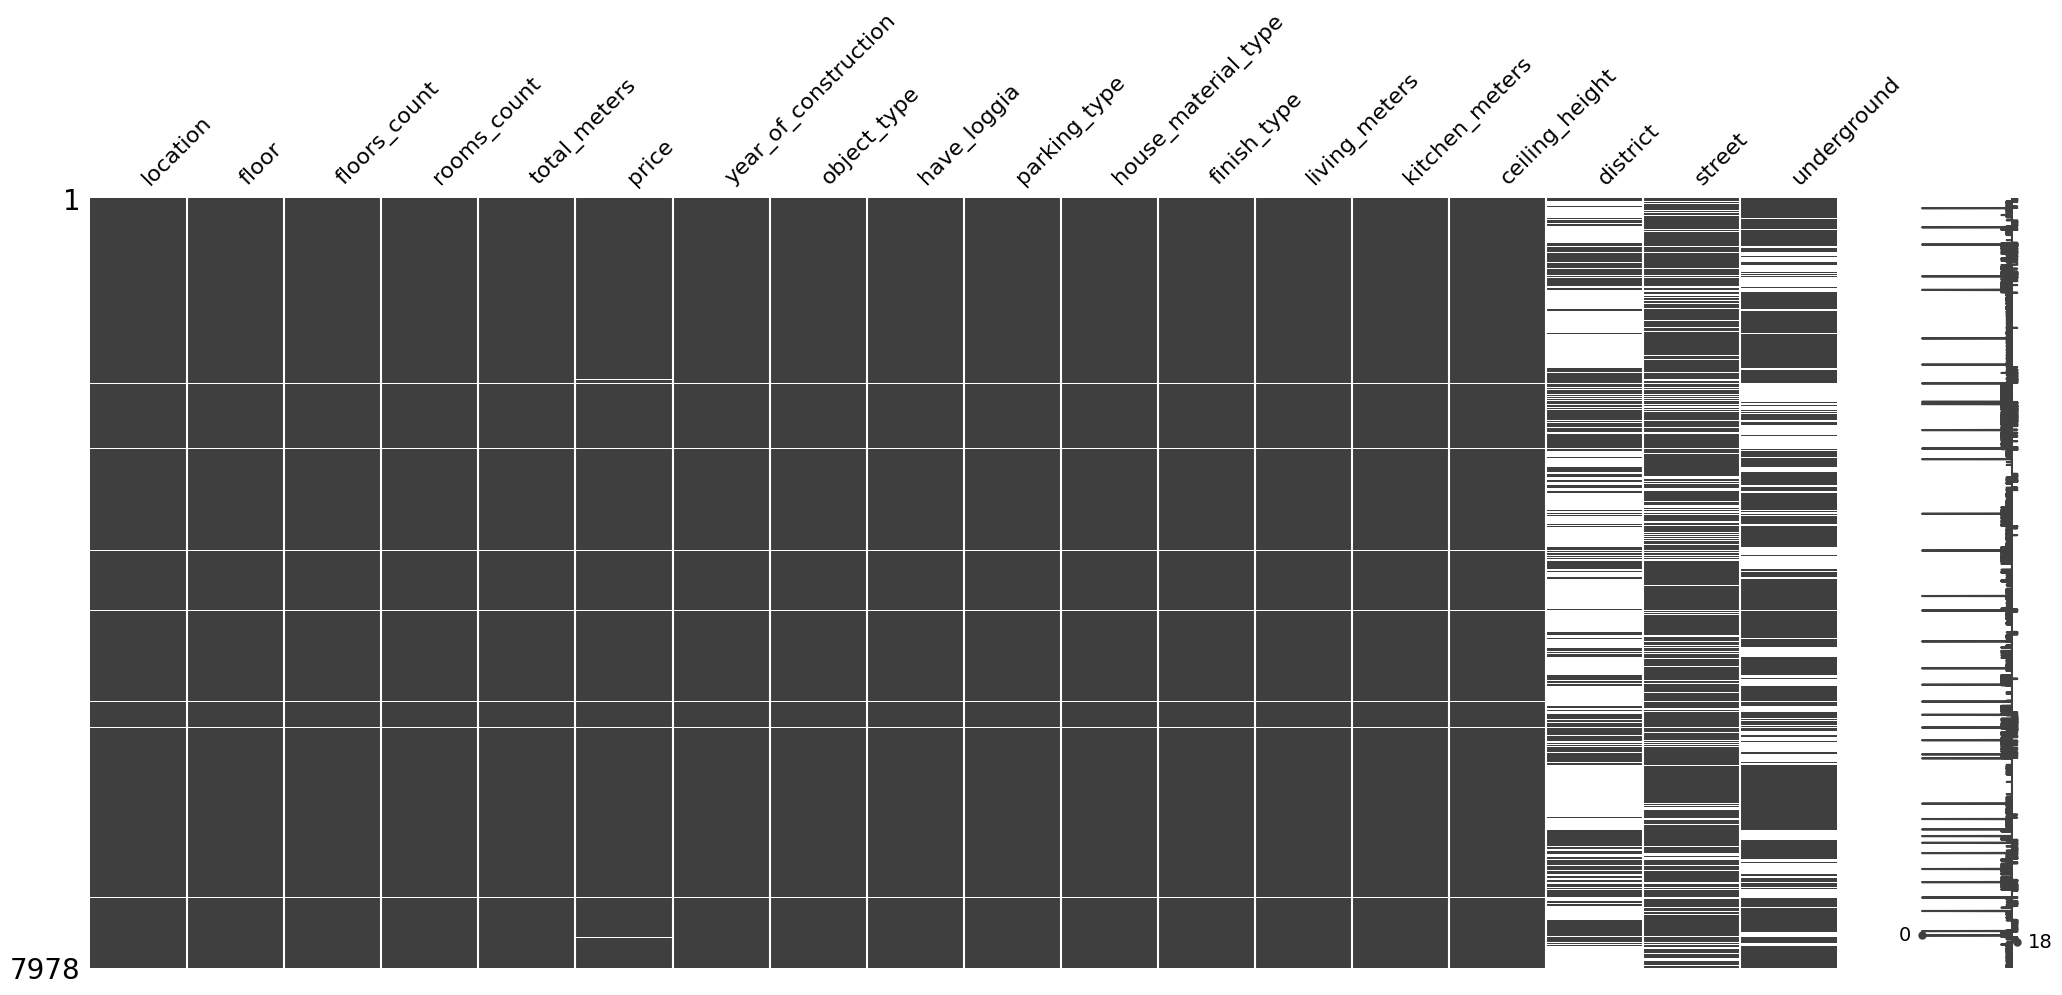

In [152]:
plt.figure(figsize=(10, 6))
msno.matrix(df)
plt.show()

In [153]:
df = df.dropna(thresh=4)
df = df.drop_duplicates()
df.shape

(7215, 18)

In [154]:
check_null = df.isnull().sum().reset_index()
print(check_null)

                   index     0
0               location     0
1                  floor     0
2           floors_count     0
3            rooms_count     0
4           total_meters     0
5                  price    13
6   year_of_construction     0
7            object_type     0
8            have_loggia     0
9           parking_type     0
10   house_material_type     0
11           finish_type     0
12         living_meters     0
13        kitchen_meters     0
14        ceiling_height     0
15              district  4346
16                street  1498
17           underground  2203


In [155]:
df.replace('-1', np.nan, inplace=True)
df['have_loggia'] = df['have_loggia'].fillna('0')
df['parking_type'] = df['parking_type'].fillna('0')

In [156]:
df = df.dropna(subset=['price'])
df = df.dropna(subset=['total_meters'])
df = df.dropna(subset=['rooms_count'])
null = df.isnull().sum().reset_index()
missing_percentage = df.isnull().mean() * 100
missing_percentage_df = missing_percentage.reset_index()
missing_percentage_df.columns = ['Column', 'Missing Percentage']
print(missing_percentage_df)

                  Column  Missing Percentage
0               location            0.000000
1                  floor            0.000000
2           floors_count            0.000000
3            rooms_count            0.000000
4           total_meters            0.000000
5                  price            0.000000
6   year_of_construction           17.161345
7            object_type            0.000000
8            have_loggia            0.000000
9           parking_type            0.000000
10   house_material_type           81.994655
11           finish_type           74.792517
12         living_meters           22.267548
13        kitchen_meters           16.401744
14        ceiling_height           35.110423
15              district           60.064707
16                street           20.706147
17           underground           30.735687


In [157]:
df.drop(columns=['house_material_type','finish_type'], inplace=True)
null_counts_cian = df.isnull().sum().reset_index()
print(null_counts_cian)

                   index     0
0               location     0
1                  floor     0
2           floors_count     0
3            rooms_count     0
4           total_meters     0
5                  price     0
6   year_of_construction  1220
7            object_type     0
8            have_loggia     0
9           parking_type     0
10         living_meters  1583
11        kitchen_meters  1166
12        ceiling_height  2496
13              district  4270
14                street  1472
15           underground  2185


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7109 entries, 0 to 7977
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   location              7109 non-null   object
 1   floor                 7109 non-null   object
 2   floors_count          7109 non-null   object
 3   rooms_count           7109 non-null   object
 4   total_meters          7109 non-null   object
 5   price                 7109 non-null   object
 6   year_of_construction  5889 non-null   object
 7   object_type           7109 non-null   object
 8   have_loggia           7109 non-null   object
 9   parking_type          7109 non-null   object
 10  living_meters         5526 non-null   object
 11  kitchen_meters        5943 non-null   object
 12  ceiling_height        4613 non-null   object
 13  district              2839 non-null   object
 14  street                5637 non-null   object
 15  underground           4924 non-null   objec

In [159]:
df = df.loc[df['rooms_count'] != 'rooms_count']
df['floor'] = df['floor'].replace({-1: np.nan})
df['floor'] = df['floor'].astype(float)
mean_floor = df['floor'].mean()
df['floor'] = df['floor'].fillna(mean_floor)
df['floor'] = df['floor'].astype('int64')
df['floors_count'] = df['floors_count'].replace({'floors_count': '3', -1: np.nan})
df['floors_count'] = df['floors_count'].astype(float)
mean_floors_count = df['floors_count'].mean()
df['floors_count'] = df['floors_count'].fillna(mean_floors_count)
df['floors_count'] = df['floors_count'].astype('int64')
df['rooms_count'] = df['rooms_count'].replace({'rooms_count': '3', -1: np.nan})
df['rooms_count'] = df['rooms_count'].astype(float)
mean_rooms_count = df['rooms_count'].mean()
df['rooms_count'] = df['rooms_count'].fillna(mean_rooms_count)
df['rooms_count'] = df['rooms_count'].astype('int64')
df['total_meters'] = df['total_meters'].replace({-1: np.nan})
df['total_meters'] = df['total_meters'].astype(float)
mean_total_meters = df['total_meters'].mean()
df['total_meters'] = df['total_meters'].fillna(mean_total_meters)
df['price'] = df['price'].replace({-1: np.nan})
df['price'] = df['price'].astype(float)
mean_price = df['price'].mean()
df['price'] = df['price'].fillna(mean_price)
df['price'] = df['price'].astype('int64')
df['ceiling_height'] = df['ceiling_height'].str.replace(r'\xa0м', '', regex=True)
df['ceiling_height'] = df['ceiling_height'].str.replace(',', '.')
df['ceiling_height'] = df['ceiling_height'].replace({'-1': np.nan})
df['ceiling_height'] = df['ceiling_height'].astype(float)
mean_ceiling_height = df['ceiling_height'].mean()
df['ceiling_height'] = df['ceiling_height'].fillna(mean_ceiling_height)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7108 entries, 0 to 7977
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              7108 non-null   object 
 1   floor                 7108 non-null   int64  
 2   floors_count          7108 non-null   int64  
 3   rooms_count           7108 non-null   int64  
 4   total_meters          7108 non-null   float64
 5   price                 7108 non-null   int64  
 6   year_of_construction  5888 non-null   object 
 7   object_type           7108 non-null   object 
 8   have_loggia           7108 non-null   object 
 9   parking_type          7108 non-null   object 
 10  living_meters         5525 non-null   object 
 11  kitchen_meters        5942 non-null   object 
 12  ceiling_height        7108 non-null   float64
 13  district              2838 non-null   object 
 14  street                5636 non-null   object 
 15  underground           4923

In [160]:
numerical_description = df.describe()
print(numerical_description)

             floor  floors_count  rooms_count  total_meters         price  \
count  7108.000000   7108.000000  7108.000000   7108.000000  7.108000e+03   
mean      7.410664     13.929516     1.732273     51.684115  1.503661e+07   
std       6.678724      9.151198     0.846576     30.554660  4.767036e+07   
min       1.000000      1.000000     1.000000     13.000000  8.300000e+05   
25%       3.000000      7.000000     1.000000     35.000000  5.400000e+06   
50%       5.000000     13.000000     2.000000     44.500000  7.764431e+06   
75%      10.000000     18.000000     2.000000     60.000000  1.100000e+07   
max      82.000000     97.000000     5.000000    590.300000  2.361200e+09   

       ceiling_height  
count     7108.000000  
mean         2.828591  
std          0.684568  
min          0.000000  
25%          2.700000  
50%          2.828591  
75%          2.828591  
max         52.000000  


In [161]:
columns_to_check = ['floor', 'floors_count', 'rooms_count', 'total_meters', 'price', 'ceiling_height']
missing_values = df[columns_to_check].isnull().sum()
missing_percent = (df[columns_to_check].isnull().mean() * 100).round(2)
missing_info = pd.DataFrame({'Пропуски (кол-во)': missing_values, 'Пропуски (%)': missing_percent})
print("Информация о пропусках в указанных колонках:")
print(missing_info)

Информация о пропусках в указанных колонках:
                Пропуски (кол-во)  Пропуски (%)
floor                           0           0.0
floors_count                    0           0.0
rooms_count                     0           0.0
total_meters                    0           0.0
price                           0           0.0
ceiling_height                  0           0.0


In [162]:
columns_to_check = ['floor', 'floors_count', 'rooms_count', 'total_meters', 'price', 'ceiling_height']
zero_values = (df[columns_to_check] == 0).sum()
zero_percent = ((df[columns_to_check] == 0).mean() * 100).round(2)
zero_info = pd.DataFrame({'Нули (кол-во)': zero_values, 'Нули (%)': zero_percent})
print("Информация о нулевых значениях в указанных колонках:")
print(zero_info)
df = df[df['ceiling_height'] != 1]

Информация о нулевых значениях в указанных колонках:
                Нули (кол-во)  Нули (%)
floor                       0      0.00
floors_count                0      0.00
rooms_count                 0      0.00
total_meters                0      0.00
price                       0      0.00
ceiling_height              1      0.01


In [163]:
bounds = {
    'floor': (1, 97),
    'floors_count': (1, 97),
    'rooms_count': (1, 6),
    'total_meters': (8, 260), 
    'price': (2000000, 2000000000),
    'ceiling_height': (2.0, 7.0),    
}
for column, (lower, upper) in bounds.items():
    df = df[(df[column] >= lower) & (df[column] <= upper)]
numerical_description_cleaned = df.describe()
print(numerical_description_cleaned)

             floor  floors_count  rooms_count  total_meters         price  \
count  7036.000000   7036.000000  7036.000000   7036.000000  7.036000e+03   
mean      7.388431     13.950682     1.727828     50.878475  1.385017e+07   
std       6.455197      8.965478     0.833365     25.018009  3.201114e+07   
min       1.000000      1.000000     1.000000     13.000000  2.000000e+06   
25%       3.000000      7.000000     1.000000     35.100000  5.428808e+06   
50%       5.000000     14.000000     2.000000     44.500000  7.800000e+06   
75%      10.000000     18.000000     2.000000     60.000000  1.100000e+07   
max      79.000000     97.000000     5.000000    250.000000  8.347600e+08   

       ceiling_height  
count     7036.000000  
mean         2.817257  
std          0.224763  
min          2.000000  
25%          2.700000  
50%          2.828591  
75%          2.828591  
max          6.000000  


In [164]:
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]
print("Колонки с пропущенными значениями и их количество:")
print(missing_data)

Колонки с пропущенными значениями и их количество:
year_of_construction    1200
living_meters           1553
kitchen_meters          1148
district                4252
street                  1459
underground             2138
dtype: int64


In [165]:

df['year_of_construction'] = pd.to_numeric(df['year_of_construction'], errors='coerce')
median_year = df['year_of_construction'].median()
df['year_of_construction'].fillna(median_year, inplace=True)
print("Проверка пропусков в колонке 'year_of_construction' после заполнения:")
print(df['year_of_construction'].isnull().sum())

Проверка пропусков в колонке 'year_of_construction' после заполнения:
0


C:\Users\josha\AppData\Local\Temp\ipykernel_12192\4207435526.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['year_of_construction'].fillna(median_year, inplace=True)


<Figure size 1000x600 with 0 Axes>

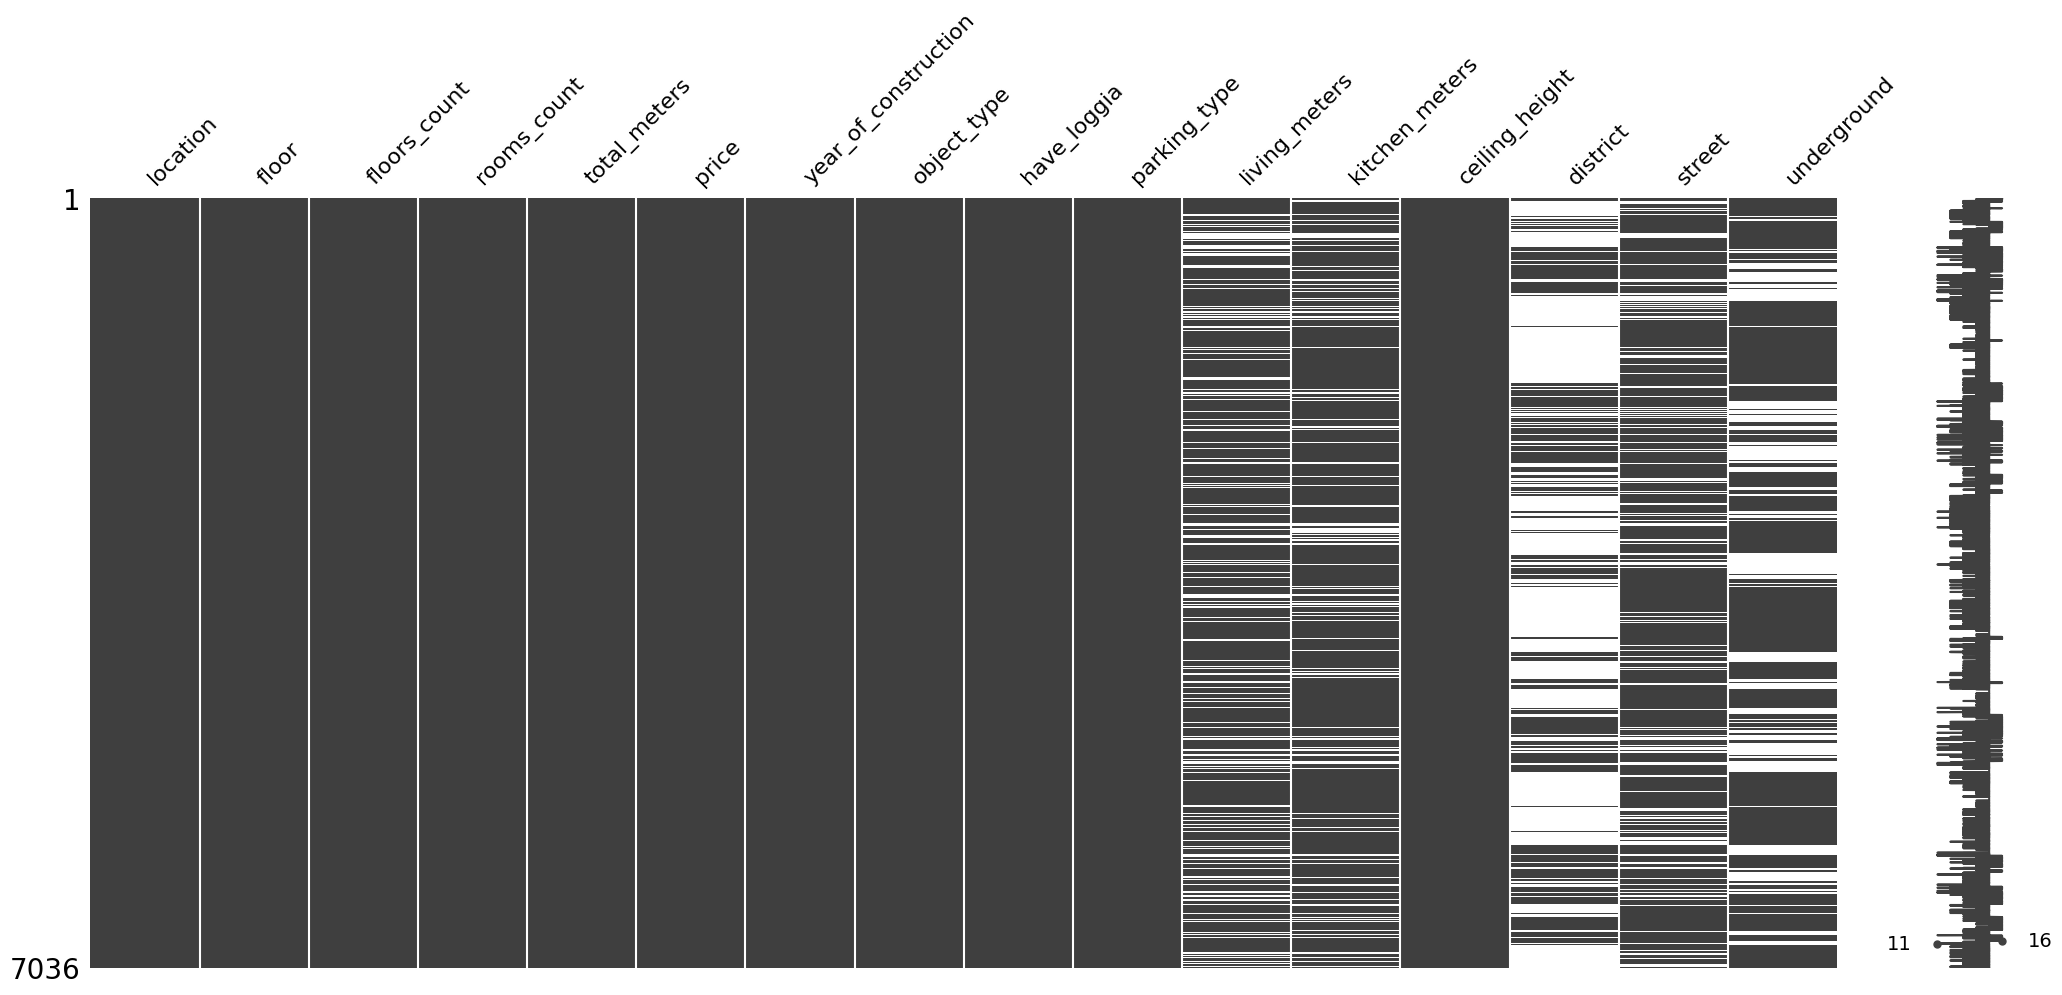

In [166]:
plt.figure(figsize=(10, 6))
msno.matrix(df)
plt.show()

In [167]:
df['located'] = df['district'].fillna(df['underground'])
df['located'] = df['located'].fillna(df['underground'])
df.drop(columns=['district','underground'], inplace=True)

In [168]:
null = df.isnull().sum().reset_index()
missing_percentage = df.isnull().mean() * 100
missing_percentage_df = missing_percentage.reset_index()
missing_percentage_df.columns = ['Column', 'Missing Percentage']
print(missing_percentage_df)

                  Column  Missing Percentage
0               location            0.000000
1                  floor            0.000000
2           floors_count            0.000000
3            rooms_count            0.000000
4           total_meters            0.000000
5                  price            0.000000
6   year_of_construction            0.000000
7            object_type            0.000000
8            have_loggia            0.000000
9           parking_type            0.000000
10         living_meters           22.072200
11        kitchen_meters           16.316089
12        ceiling_height            0.000000
13                street           20.736214
14               located            6.338829


In [169]:
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]
print("Колонки с пропущенными значениями и их количество:")
print(missing_data)

Колонки с пропущенными значениями и их количество:
living_meters     1553
kitchen_meters    1148
street            1459
located            446
dtype: int64


In [170]:
df = df.dropna(subset=['located'])

In [ ]:
df.drop(columns=['street'], inplace=True)
# df['kitchen_meters'] = df['total_meters'] * 0.3
# df['living_meters'] = df['total_meters'] * 0.7
# print(df[['total_meters', 'kitchen_meters', 'living_meters']].head())
# Заполняем отсутствующие значения медианой для столбца kitchen_meters
# Удаляем пробелы и символы, оставляя только числа

df['kitchen_meters'] = df['kitchen_meters'].str.replace(r'\xa0м²', '', regex=True)
df['kitchen_meters'] = df['kitchen_meters'].str.replace(',', '.')
df['kitchen_meters'] = df['kitchen_meters'].replace({'-1': np.nan})
df['kitchen_meters'] = df['kitchen_meters'].astype(float)
df['living_meters'] = df['living_meters'].str.replace(r'\xa0м²', '', regex=True)
df['living_meters'] = df['living_meters'].str.replace(',', '.')
df['living_meters'] = df['living_meters'].replace({'-1': np.nan})
df['living_meters'] = df['living_meters'].astype(float)
mean_kitchen_meters = df['kitchen_meters'].mean()
mean_living_meters = df['living_meters'].mean()
df['kitchen_meters'] = df['kitchen_meters'].fillna(mean_kitchen_meters)
df['living_meters'] = df['living_meters'].fillna(mean_living_meters)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6590 entries, 1 to 7977
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              6590 non-null   object 
 1   floor                 6590 non-null   int64  
 2   floors_count          6590 non-null   int64  
 3   rooms_count           6590 non-null   int64  
 4   total_meters          6590 non-null   float64
 5   price                 6590 non-null   int64  
 6   year_of_construction  6590 non-null   float64
 7   object_type           6590 non-null   object 
 8   have_loggia           6590 non-null   object 
 9   parking_type          6590 non-null   object 
 10  living_meters         6590 non-null   float64
 11  kitchen_meters        6590 non-null   float64
 12  ceiling_height        6590 non-null   float64
 13  located               6590 non-null   object 
dtypes: float64(5), int64(4), object(5)
memory usage: 772.3+ KB


In [172]:
df = df[(df['year_of_construction'] >= 1945) & (df['year_of_construction'] <= 2024)]
print(f'Количество записей после удаления выбросов: {df.shape[0]}')

Количество записей после удаления выбросов: 5450


<Figure size 1000x600 with 0 Axes>

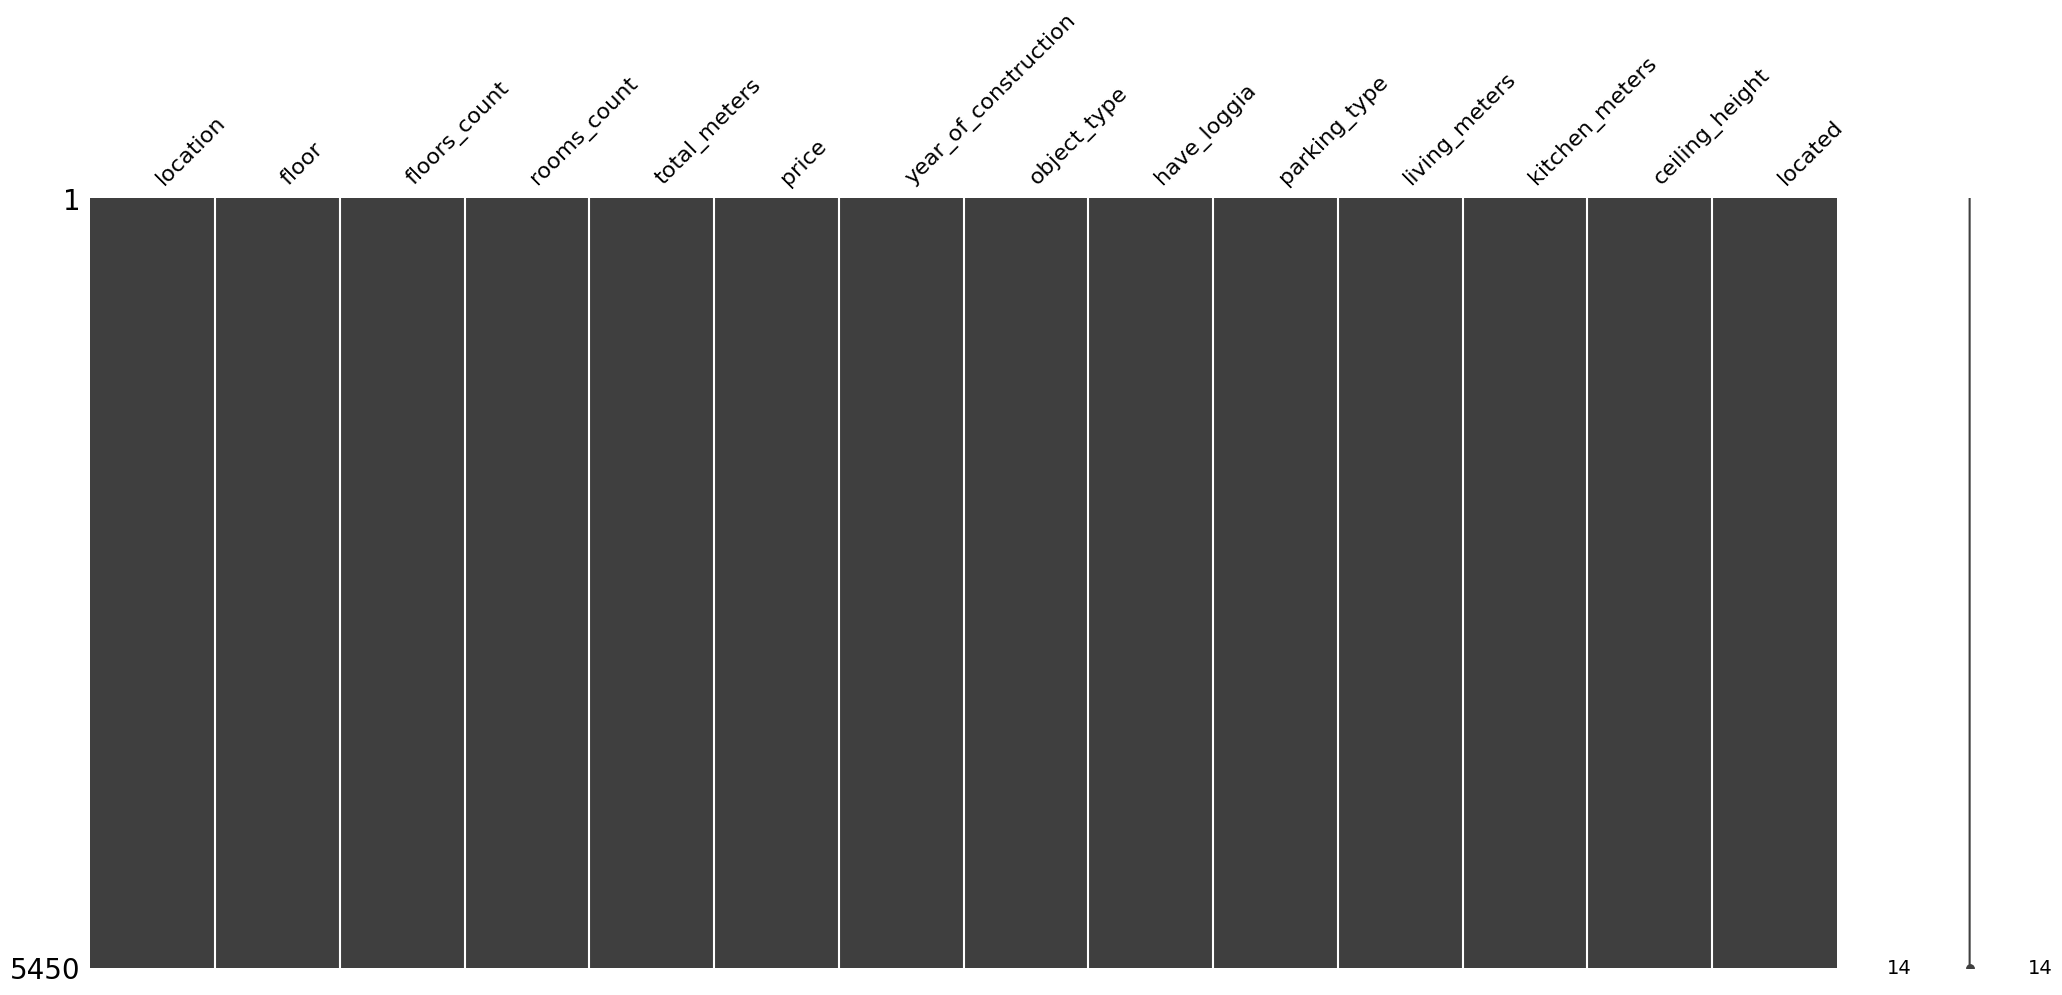

In [173]:
plt.figure(figsize=(10, 6))
msno.matrix(df)
plt.show()

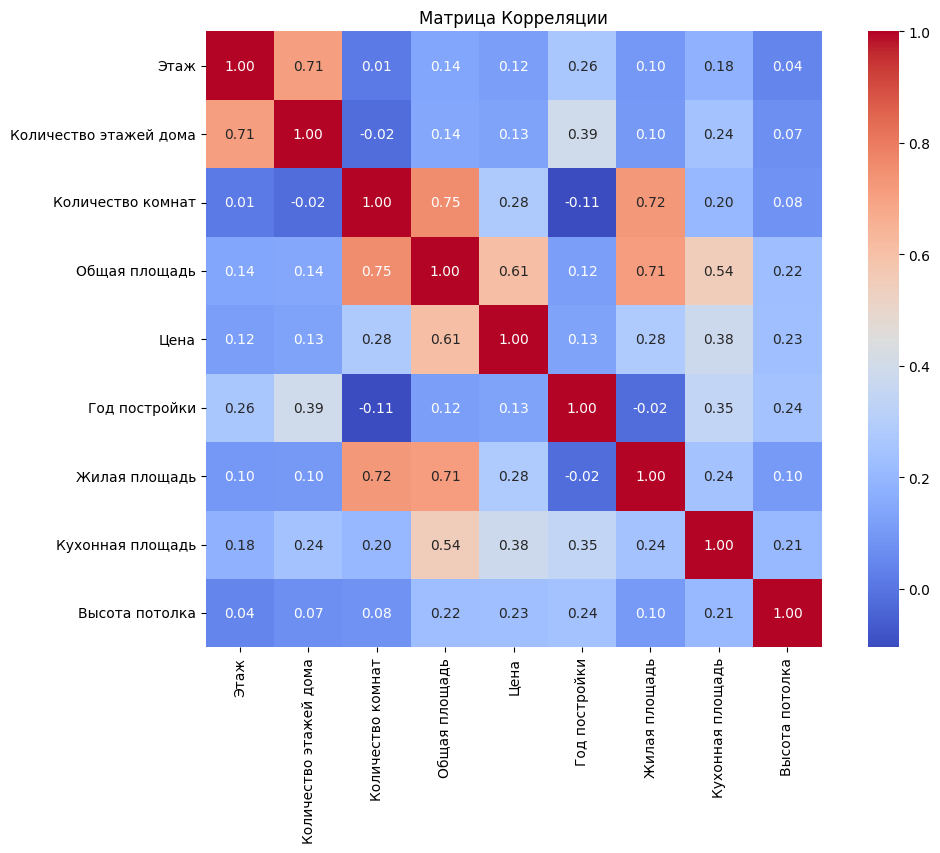

In [174]:
column_name_mapping = {
    'floor': 'Этаж',
    'floors_count': 'Количество этажей дома',
    'rooms_count': 'Количество комнат',
    'total_meters': 'Общая площадь',
    'price': 'Цена',
    'ceiling_height': 'Высота потолка',
    'living_meters': 'Жилая площадь',
    'kitchen_meters': 'Кухонная площадь',
    'year_of_construction': 'Год постройки'
}
numeric_df = df.select_dtypes(include=[np.number]).rename(columns=column_name_mapping)
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True, xticklabels=numeric_df.columns, yticklabels=numeric_df.columns)
plt.title('Матрица Корреляции')
plt.show()


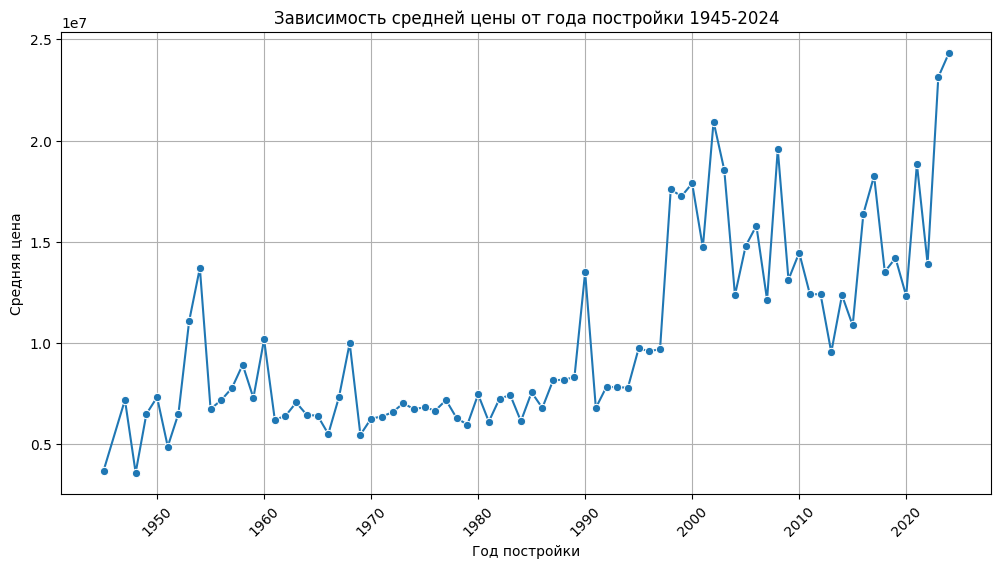

In [175]:
average_price_per_year = df.groupby('year_of_construction')['price'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_price_per_year, x='year_of_construction', y='price', marker='o')
plt.title('Зависимость средней цены от года постройки 1945-2024')
plt.xlabel('Год постройки')
plt.ylabel('Средняя цена')
plt.xticks(rotation=45)
plt.grid()
plt.show()

C:\Users\josha\AppData\Local\Temp\ipykernel_12192\3973909759.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rooms_count', palette='viridis')


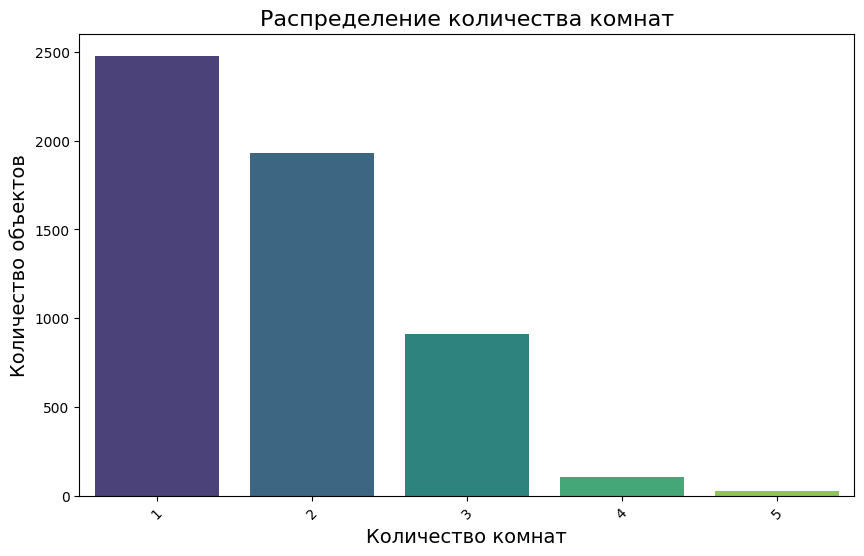

In [176]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='rooms_count', palette='viridis')
plt.title('Распределение количества комнат', fontsize=16)
plt.xlabel('Количество комнат', fontsize=14)
plt.ylabel('Количество объектов', fontsize=14)
plt.xticks(rotation=45)
plt.show()

C:\Users\josha\AppData\Local\Temp\ipykernel_12192\3293354940.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_area, x='rooms_count', y='total_meters', palette='viridis')


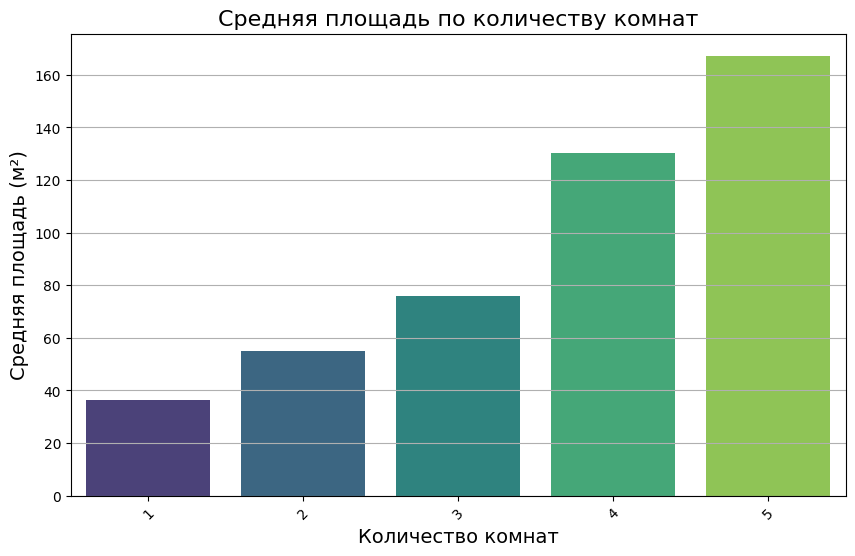

In [177]:
average_area = df.groupby('rooms_count')['total_meters'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=average_area, x='rooms_count', y='total_meters', palette='viridis')
plt.title('Средняя площадь по количеству комнат', fontsize=16)
plt.xlabel('Количество комнат', fontsize=14)
plt.ylabel('Средняя площадь (м²)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

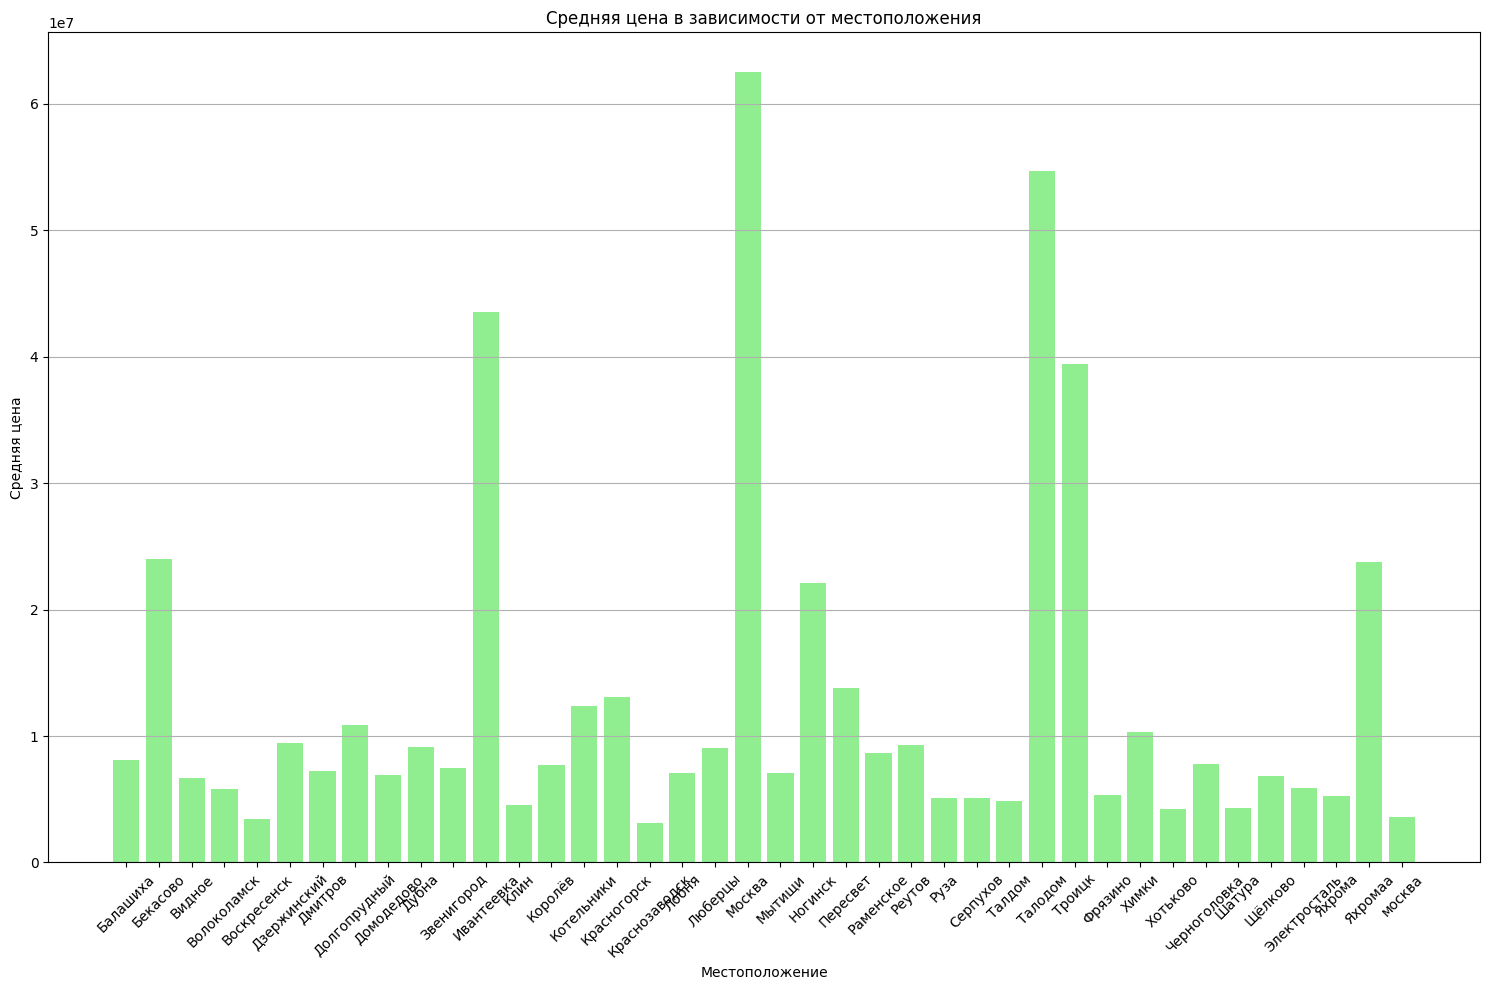

In [178]:
average_price_by_location = df.groupby('location')['price'].mean().reset_index()
plt.figure(figsize=(15, 10))
plt.bar(average_price_by_location['location'], average_price_by_location['price'], color='lightgreen')
plt.title('Средняя цена в зависимости от местоположения')
plt.xlabel('Местоположение')
plt.ylabel('Средняя цена')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [179]:
df['price_per_sqm'] = df['price'] / df['total_meters']
average_price_per_sqm = df['price_per_sqm'].mean()
print(f'Средняя цена за квадратный метр: {average_price_per_sqm:.2f} руб.')


Средняя цена за квадратный метр: 225512.54 руб.


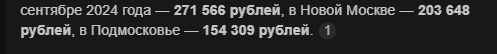